# File and libraries

In [50]:
import pandas as pd
import numpy as np


filepath=r'data/df_gira_agg_2h_scaling_input.csv'


file_tag = "Gira Bike"


# DSLabs functions

In [51]:
%run "scripts/dslabs_functions.py"


# Data functions

In [52]:
%run "scripts/data_functions.py"


data_functions lodaded


In [53]:
import pandas as pd

# Carregar o dataset
data = pd.read_csv(filepath, decimal=",", index_col='date', parse_dates=True, infer_datetime_format=True)

# Verificar os tipos de dados antes da conversão
display(data.dtypes)

# Forçar a conversão para o tipo numérico para todas as colunas que devem ser numéricas
# Selecionando todas as colunas, exceto o índice (que é de data)
numeric_columns = data.columns.difference(['date'])

# Tentar converter as colunas numéricas
for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

test_split_threshold=0.9
target = 'target_station_load_rate' 

# Verifique o tipo das colunas após a conversão
print("\nTipos de dados após a conversão:")
display(data.dtypes)

# Exibir as últimas linhas para confirmar que os dados estão corretos
display(data.tail())

display(data.index.min())
display(data.index.max())
display(data.shape)


temperature_2m                                                 object
rain_mm                                                        object
wmo_weather_code                                               object
wind_speed_10m                                                 object
is_holiday_lisbon                                              object
target_station_status                                          object
target_station_load_rate                                       object
station_load_rate_ Rua do Arco Cego / Av. Magalhães Lima       object
station_load_rate_ Av. Rovisco Pais / Av. Manuel da Maia       object
station_load_rate_ Praça de Londres                            object
station_load_rate_ Av. Duque de Ávila / Jardim Arco Do Cego    object
station_load_rate_ Av. Barbosa Du Bocage / Rua Arco do Cego    object
dtype: object


Tipos de dados após a conversão:


temperature_2m                                                 float64
rain_mm                                                        float64
wmo_weather_code                                               float64
wind_speed_10m                                                 float64
is_holiday_lisbon                                              float64
target_station_status                                          float64
target_station_load_rate                                       float64
station_load_rate_ Rua do Arco Cego / Av. Magalhães Lima       float64
station_load_rate_ Av. Rovisco Pais / Av. Manuel da Maia       float64
station_load_rate_ Praça de Londres                            float64
station_load_rate_ Av. Duque de Ávila / Jardim Arco Do Cego    float64
station_load_rate_ Av. Barbosa Du Bocage / Rua Arco do Cego    float64
dtype: object

,temperature_2m,rain_mm,wmo_weather_code,wind_speed_10m,is_holiday_lisbon,target_station_status,target_station_load_rate,station_load_rate_ Rua do Arco Cego / Av. Magalhães Lima,station_load_rate_ Av. Rovisco Pais / Av. Manuel da Maia,station_load_rate_ Praça de Londres,station_load_rate_ Av. Duque de Ávila / Jardim Arco Do Cego,station_load_rate_ Av. Barbosa Du Bocage / Rua Arco do Cego
date,,,,,,,,,,,,
2023-03-31 14:00:00,0.629548,-0.185984,-0.266712,0.372947,-0.185323,-18.098242,0.046047,1.197282,-0.286165,-0.500981,0.685285,-0.584853
2023-03-31 16:00:00,0.419629,-0.185984,-0.266712,0.228509,-0.185323,0.056934,0.098741,0.524269,-0.363202,-0.461967,0.435683,-0.773243
2023-03-31 18:00:00,0.018876,-0.185984,-0.266712,-0.509729,-0.185323,0.056934,-0.537644,-0.236529,0.727484,-0.146307,-0.415901,-0.323200
2023-03-31 20:00:00,-0.420045,-0.185984,-0.266712,-1.103530,-0.185323,0.056934,0.001460,0.599512,0.111185,-1.075554,-0.557831,0.048348
2023-03-31 22:00:00,-0.668130,-0.185984,-0.266712,-1.167724,-0.185323,0.056934,1.099933,0.403043,0.111185,-0.500981,-0.949364,0.200106


Timestamp('2022-01-01 12:00:00')

Timestamp('2023-03-31 22:00:00')

(5421, 12)

# Aggregation
- Aggregation is just the operation of grouping smaller details into a coarser one, most similar to the approach we took in the profiling step.

- In order to do it, we just need to apply the previous function - ts_aggregation_by, already available in the dslabs_functions file, that receives the univariate series to transform, the granularity level to aggregate into - gran_level, and the aggregation function to apply - agg_func.

## Aggregation 0 (no tranformation)

### df_0 - Creating series for original df with time +target variable

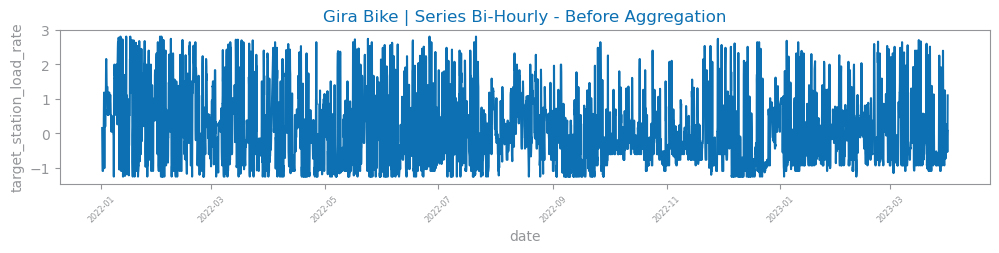

In [71]:
from pandas import read_csv, DataFrame, Series
from matplotlib.pyplot import figure, show
from dslabs_functions import plot_line_chart, HEIGHT

target = 'target_station_load_rate' 

data_0 = data.copy()

df_0: DataFrame = data_0
#series - series of original df with no transformation
series: Series = df_0[target]

figure(figsize=(3 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    series.index.to_list(),
    series.to_list(),
    xlabel=series.index.name,
    ylabel=target,
    title=f"{file_tag} | Series Bi-Hourly - Before Aggregation",
)
show()

In [25]:
display(df_0.head())
display(series.head())

,temperature_2m,rain_mm,wmo_weather_code,wind_speed_10m,is_holiday_lisbon,target_station_status,target_station_load_rate,station_load_rate_ Rua do Arco Cego / Av. Magalhães Lima,station_load_rate_ Av. Rovisco Pais / Av. Manuel da Maia,station_load_rate_ Praça de Londres,station_load_rate_ Av. Duque de Ávila / Jardim Arco Do Cego,station_load_rate_ Av. Barbosa Du Bocage / Rua Arco do Cego
date,,,,,,,,,,,,
2022-01-01 12:00:00,0.209711,-0.185984,-0.266712,-1.183773,5.395986,0.056934,0.155489,-0.295052,0.545027,0.563042,-0.841692,-0.495891
2022-01-01 14:00:00,0.438713,-0.185984,-0.266712,-1.135627,5.395986,0.056934,-0.440362,-0.892822,0.131458,0.846781,-0.807433,-0.673815
2022-01-01 16:00:00,0.076126,-0.185984,-0.325721,-1.071433,5.395986,0.056934,-0.926771,-0.219808,-1.028156,-0.018624,-1.233225,-0.977332
2022-01-01 18:00:00,-0.458211,-0.185984,-0.266712,-0.846751,5.395986,0.056934,-1.088907,-0.654550,-0.338875,-1.032993,-1.443674,-0.846506
2022-01-01 20:00:00,-0.477295,-0.185984,-0.266712,-0.654167,5.395986,0.056934,-1.088907,-0.596027,0.078749,-0.589650,-0.699762,-0.846506


date
2022-01-01 12:00:00    0.155489
2022-01-01 14:00:00   -0.440362
2022-01-01 16:00:00   -0.926771
2022-01-01 18:00:00   -1.088907
2022-01-01 20:00:00   -1.088907
Name: target_station_load_rate, dtype: float64

### Evaluate

In [72]:
from pandas import Series, DataFrame

def series_train_test_split(data, trn_pct: float = 0.90):
    trn_size: int = int(len(data) * trn_pct)
    df_cp = data.copy()

    if isinstance(df_cp, Series):
        train: Series = df_cp.iloc[:trn_size]
        test: Series = df_cp.iloc[trn_size:]
    elif isinstance(df_cp, DataFrame):
        train: DataFrame = df_cp.iloc[:trn_size]
        test: DataFrame = df_cp.iloc[trn_size:]
    else:
        raise TypeError("Input must be a Series or DataFrame.")

    return train, test

def dataframe_temporal_train_test_split(data: DataFrame, trn_pct: float = 0.90) -> tuple[DataFrame, DataFrame]:
    trn_size: int = int(len(data) * trn_pct)
    df_cp: DataFrame = data.copy()
    train: DataFrame = df_cp.iloc[:trn_size]
    test: DataFrame = df_cp.iloc[trn_size:]
    return train, test

In [74]:
from math import sqrt
from matplotlib.pyplot import subplots
from pandas import Series

def plot_forecasting_eval(trn: Series, tst: Series, prd_trn: Series, prd_tst: Series, title: str = "") -> list:
    # Calculate evaluation metrics
    ev1: dict = {
        "RMSE": [sqrt(FORECAST_MEASURES["MSE"](trn, prd_trn)), sqrt(FORECAST_MEASURES["MSE"](tst, prd_tst))],
        "MAE": [FORECAST_MEASURES["MAE"](trn, prd_trn), FORECAST_MEASURES["MAE"](tst, prd_tst)],
    }
    ev2: dict = {
        "MAPE": [FORECAST_MEASURES["MAPE"](trn, prd_trn), FORECAST_MEASURES["MAPE"](tst, prd_tst)],
        "R2": [FORECAST_MEASURES["R2"](trn, prd_trn), FORECAST_MEASURES["R2"](tst, prd_tst)],
    }

    # Print metric values and sizes of train and test sets
    print(f"\n### Forecasting Evaluation Metrics ({title}) ###")
    print(f"Train size: {len(trn)}")
    print(f"Test size: {len(tst)}")
    print(f"RMSE - Train: {ev1['RMSE'][0]:.4f}, Test: {ev1['RMSE'][1]:.4f}")
    print(f"MAE - Train: {ev1['MAE'][0]:.4f}, Test: {ev1['MAE'][1]:.4f}")
    print(f"MAPE - Train: {ev2['MAPE'][0]:.4f}, Test: {ev2['MAPE'][1]:.4f}")
    print(f"R2 - Train: {ev2['R2'][0]:.4f}, Test: {ev2['R2'][1]:.4f}\n")

    # Plot the metrics
    HEIGHT = 6
    fig, axs = subplots(1, 2, figsize=(1.5 * HEIGHT, 0.75 * HEIGHT), squeeze=True)
    fig.suptitle(title)
    plot_multibar_chart(["train", "test"], ev1, ax=axs[0], title="Scale-dependent error", percentage=False)
    plot_multibar_chart(["train", "test"], ev2, ax=axs[1], title="Percentage error", percentage=True)

    return axs

In [75]:
test_split_threshold=0.9


### Forecasting Evaluation Metrics (Gira Bike | Linear Regression - No Aggregation) ###
Train size: 4878
Test size: 543
RMSE - Train: 0.9859, Test: 1.0247
MAE - Train: 0.8066, Test: 0.7382
MAPE - Train: 1.2797, Test: 1.7767
R2 - Train: 0.0322, Test: -0.0948



array([<Axes: title={'center': 'Scale-dependent error'}>,
       <Axes: title={'center': 'Percentage error'}>], dtype=object)

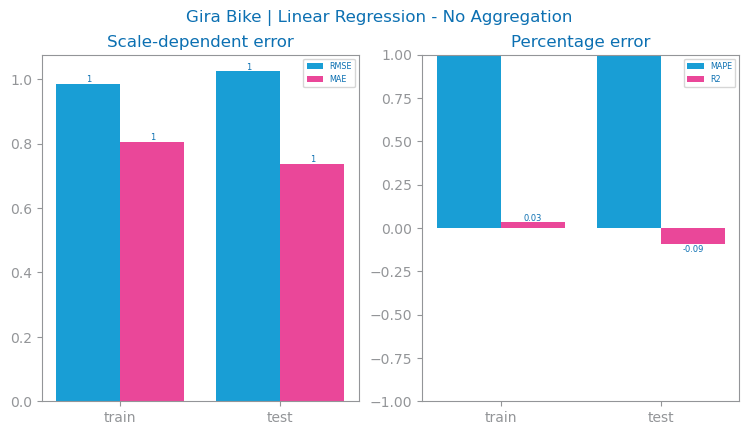

In [77]:
from sklearn.linear_model import LinearRegression
from matplotlib.pyplot import savefig
import pandas as pd
from numpy import arange


series = series.sort_index()

train_0, test_0 = series_train_test_split(series, trn_pct=test_split_threshold)

trnX_0 = arange(len(train_0)).reshape(-1, 1)
trnY_0 = train_0.to_numpy()
tstX_0 = arange(len(train_0), len(series)).reshape(-1, 1)
tstY_0 = test_0.to_numpy()

model = LinearRegression()
model.fit(trnX_0, trnY_0)

prd_trn_0: Series = Series(model.predict(trnX_0), index=train_0.index)
prd_tst_0: Series = Series(model.predict(tstX_0), index=test_0.index)

plot_forecasting_eval(train_0, test_0, prd_trn_0, prd_tst_0, title=f"{file_tag} | Linear Regression - No Aggregation")

## Aggregation 1 (agg daily)

### Aggregration 1 - strategy Application

In [78]:
def ts_aggregation_by(
    data: Series | DataFrame,
    gran_level: str = "D",
    agg_func: str = "mean",
) -> Series | DataFrame:
    # Make sure the index is a DatetimeIndex
    if not isinstance(data.index, pd.DatetimeIndex):
        data.index = pd.to_datetime(data.index)
    
    df: Series | DataFrame = data.copy()
    index: Index[Period] = df.index.to_period(gran_level)  # Convert to PeriodIndex based on granularity
    df = df.groupby(by=index, dropna=True, sort=True).agg(agg_func)
    
    # Optional: Drop duplicates in the index if needed
    df.index = df.index.to_timestamp()  # Convert PeriodIndex back to DatetimeIndex
    
    return df

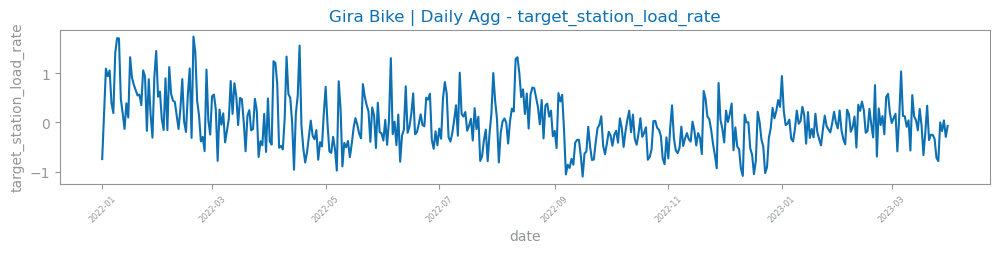

In [79]:
from pandas import read_csv, DataFrame, Series

target = 'target_station_load_rate' 


series_agg_day: Series = ts_aggregation_by(series, gran_level="d", agg_func="mean")
series_agg_day.index = pd.to_datetime(series_agg_day.index)

figure(figsize=(3 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    series_agg_day.index.to_list(),
    series_agg_day.to_list(),
    xlabel=series_agg_day.index.name,
    ylabel=target,
    title=f"{file_tag} | Daily Agg - {target}",
)
show()

### Aggregration 1 - Evaluate

In [80]:
test_split_threshold=0.9


### Forecasting Evaluation Metrics (Gira Bike | Linear Regression - Daily Aggregation) ###
Train size: 409
Test size: 46
RMSE - Train: 0.5045, Test: 0.4864
MAE - Train: 0.4034, Test: 0.3958
MAPE - Train: 3.1137, Test: 16.8874
R2 - Train: 0.1094, Test: -0.6366



array([<Axes: title={'center': 'Scale-dependent error'}>,
       <Axes: title={'center': 'Percentage error'}>], dtype=object)

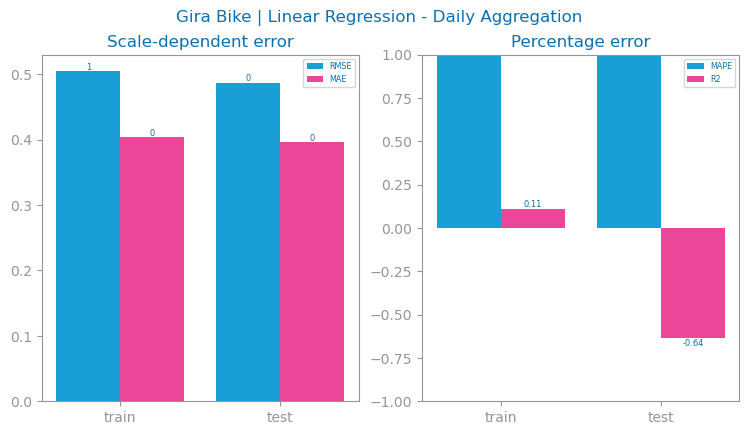

In [83]:
from sklearn.linear_model import LinearRegression
from matplotlib.pyplot import savefig
import pandas as pd
from numpy import arange
series_agg_day = series_agg_day.sort_index()

train_1, test_1 = series_train_test_split(series_agg_day, trn_pct=test_split_threshold)

trnX_1 = arange(len(train_1)).reshape(-1, 1)
trnY_1 = train_1.to_numpy()
tstX_1 = arange(len(train_1), len(series_agg_day)).reshape(-1, 1)
tstY_1 = test_1.to_numpy()

model = LinearRegression()
model.fit(trnX_1, trnY_1)

prd_trn_1: Series = Series(model.predict(trnX_1), index=train_1.index)
prd_tst_1: Series = Series(model.predict(tstX_1), index=test_1.index)

plot_forecasting_eval(train_1, test_1, prd_trn_1, prd_tst_1, title=f"{file_tag} | Linear Regression - Daily Aggregation")

## Aggregation 2 (agg weekly)

### Aggregration 2 - strategy Application

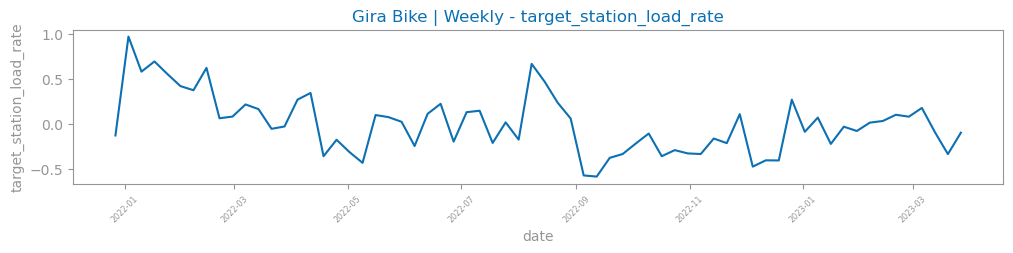

In [84]:
from pandas import read_csv, DataFrame, Series

target = 'target_station_load_rate' 


series_agg_week: Series = ts_aggregation_by(series, gran_level="w", agg_func="mean")
series_agg_week.index = pd.to_datetime(series_agg_week.index)

figure(figsize=(3 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    series_agg_week.index.to_list(),
    series_agg_week.to_list(),
    xlabel=series_agg_week.index.name,
    ylabel=target,
    title=f"{file_tag} | Weekly - {target}",
)
show()

### Aggregration 2 - Evaluate

In [85]:
test_split_threshold=0.9


### Forecasting Evaluation Metrics (Gira Bike | Linear Regression - Weekly Aggregation) ###
Train size: 59
Test size: 7
RMSE - Train: 0.2901, Test: 0.3491
MAE - Train: 0.2362, Test: 0.3165
MAPE - Train: 1.7037, Test: 4.1275
R2 - Train: 0.2658, Test: -3.7846



array([<Axes: title={'center': 'Scale-dependent error'}>,
       <Axes: title={'center': 'Percentage error'}>], dtype=object)

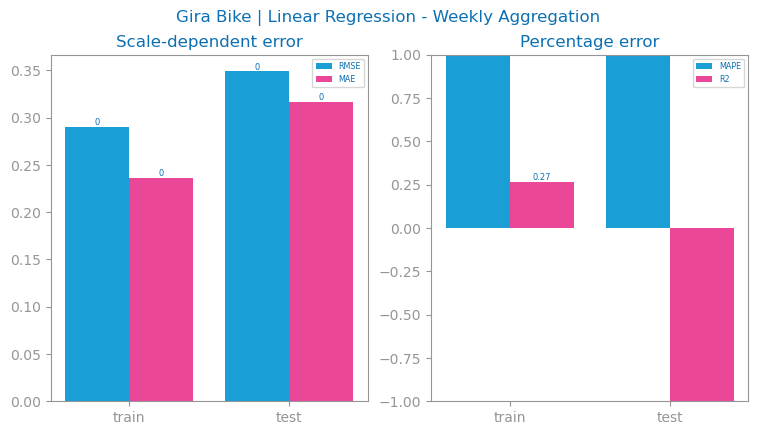

In [97]:
from sklearn.linear_model import LinearRegression
from matplotlib.pyplot import savefig
import pandas as pd
from numpy import arange

# Ensure the time series is sorted by index (date/time)
series_agg_week = series_agg_week.sort_index()

# Split the data into training and testing sets based on the specified percentage
train_2, test_2 = series_train_test_split(series_agg_week, trn_pct=test_split_threshold)

# Create feature arrays (X): 
# Training X (trnX_2) represents the indices of the training set
# Testing X (tstX_2) continues the index sequence for the test set
trnX_2 = arange(len(train_2)).reshape(-1, 1)
tstX_2 = arange(len(train_2), len(series_agg_week)).reshape(-1, 1)

# Convert target values (Y) to NumPy arrays
trnY_2 = train_2.to_numpy()
tstY_2 = test_2.to_numpy()

# Initialize and train the linear regression model using training data
model = LinearRegression()
model.fit(trnX_2, trnY_2)  # Model is trained using training X and Y

# Generate predictions:
# prd_trn_2: Predictions for the training set (used for evaluation)
# prd_tst_2: Predictions for the test set (used for forecasting)
prd_trn_2: Series = Series(model.predict(trnX_2), index=train_2.index)
prd_tst_2: Series = Series(model.predict(tstX_2), index=test_2.index)

# Plot the actual vs predicted values to evaluate model performance
plot_forecasting_eval(train_2, test_2, prd_trn_2, prd_tst_2, 
                      title=f"{file_tag} | Linear Regression - Weekly Aggregation")


## Aggregationsplot  (bi hourly, daily and weekly)

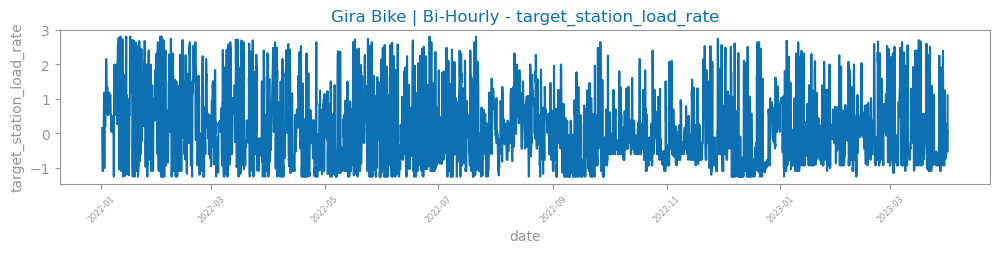

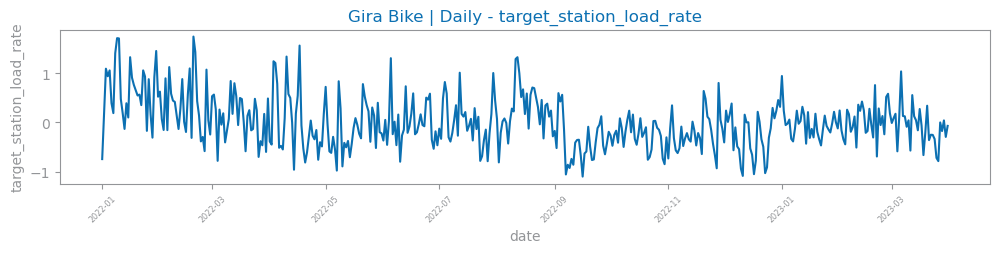

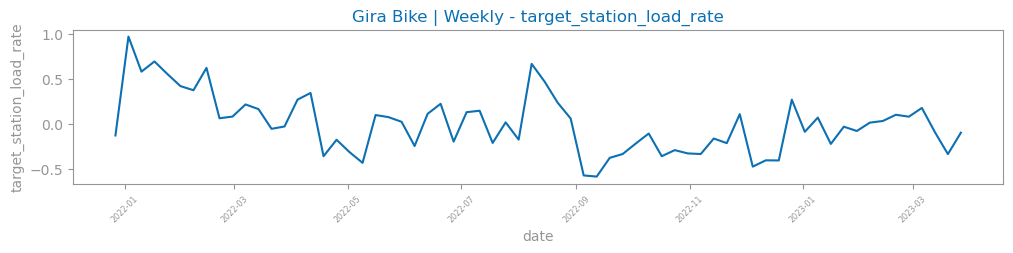

In [92]:
figure(figsize=(3 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    series.index.to_list(),
    series.to_list(),
    xlabel=series.index.name,
    ylabel=target,
    title=f"{file_tag} | Bi-Hourly - {target}",
)
show()

figure(figsize=(3 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    series_agg_day.index.to_list(),
    series_agg_day.to_list(),
    xlabel=series_agg_day.index.name,
    ylabel=target,
    title=f"{file_tag} | Daily - {target}",
)
show()

figure(figsize=(3 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    series_agg_week.index.to_list(),
    series_agg_week.to_list(),
    xlabel=series_agg_week.index.name,
    ylabel=target,
    title=f"{file_tag} | Weekly - {target}",
)
show()

## Approach uplift comparison

In [96]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

def mean_absolute_percentage_error(y_true, y_pred):
    epsilon = 1e-10  # Pequena constante para evitar divisão por zero
    return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100

# Calcular métricas para cada modelo
metrics = {
    "Model": ["No Aggregation", "Daily Aggregation", "Weekly Aggregation"],
    "MAE": [
        mean_absolute_error(test_0, prd_tst_0),
        mean_absolute_error(test_1, prd_tst_1),
        mean_absolute_error(test_2, prd_tst_2)
    ],
    "MSE": [
        mean_squared_error(test_0, prd_tst_0),
        mean_squared_error(test_1, prd_tst_1),
        mean_squared_error(test_2, prd_tst_2)
    ],
    "RMSE": [
        mean_squared_error(test_0, prd_tst_0, squared=False),
        mean_squared_error(test_1, prd_tst_1, squared=False),
        mean_squared_error(test_2, prd_tst_2, squared=False)
    ],
    "R²": [
        r2_score(test_0, prd_tst_0),
        r2_score(test_1, prd_tst_1),
        r2_score(test_2, prd_tst_2)
    ],
    "MAPE": [
        mean_absolute_percentage_error(test_0, prd_tst_0),
        mean_absolute_percentage_error(test_1, prd_tst_1),
        mean_absolute_percentage_error(test_2, prd_tst_2)
    ]
}

# Criar DataFrame para exibir as métricas
performance_df = pd.DataFrame(metrics)
display(performance_df)


,Model,MAE,MSE,RMSE,R²,MAPE
0,No Aggregation,0.738193,1.050101,1.024744,-0.094783,177.671712
1,Daily Aggregation,0.395840,0.236597,0.486412,-0.636552,1688.742005
2,Weekly Aggregation,0.316533,0.121865,0.349092,-3.784620,412.746753


## Analysis of results after Transformation

- Analysis:
    - When comparing Daily Aggregation and Weekly Aggregation, we see that Weekly Aggregation performs slightly better in terms of error metrics like MAE, MSE, and RMSE. However, both models show negative R² values, indicating poor fit, and very high MAPE, which suggests that the model predictions are not very accurate.

 - Weekly Aggregation performs better overall, but the results still leave room for improvement. Given the high errors, it might be worth testing the original bi-hourly data (no aggregation) to see if a more granular model can improve performance.

Result:
- In conclusion, although Weekly Aggregation shows slightly better results, R^increased a lot, so we will continue to nex tranformation step with df_0, the original bi hourly series with no time aggregation